# Linear Regression

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("data/A.csv")
df = df.dropna(how = 'any')

X = df.loc[:, ['x']].values
print(X.shape)
Y = df.loc[:, 'y'].values
print(Y.shape)

(94, 1)
(94,)


<b>Step 1:</b> Make an instance of the Model

In [3]:
reg = LinearRegression(fit_intercept=True)

<b>Step 2:</b> Training the model on the data, storing the information learned from the data

In [4]:
reg.fit(X,Y)

LinearRegression()

<b>Step 3:</b> Predict the values of new data

In [5]:
reg.predict(X[0].reshape(-1,1))

array([-50.99119328])

In [6]:
reg.predict(X[0:10])

array([-50.99119328, -11.39905237, 135.223663  , 121.50775193,
       102.37289634,  31.0056196 ,   4.46431068,  74.84474012,
        20.82088826,  72.16749711])

<b>Step 4:</b> Measure Accuracy of the Model

In [7]:
score = reg.score(X, Y)
print("Score: {:.2f}".format(score*100))
print("Equation: y = {:.2f}x + {:.2f}".format(reg.coef_[0], reg.intercept_))

Score: 97.99
Equation: y = 1.58x + -50.99


<b>Step 5:</b> Visualize the Model

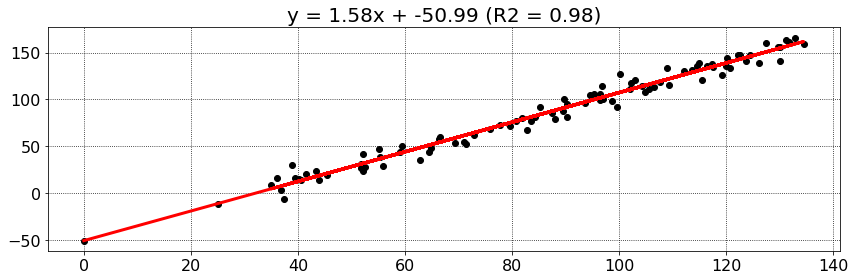

In [8]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12,4));

ax.scatter(X, Y, color='black');
ax.plot(X, reg.predict(X), color='red',linewidth=3);
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')
        
ax.tick_params(labelsize = 16)
ax.set_title("y = {:.2f}x + {:.2f} (R2 = {:.2f})".format(reg.coef_[0], reg.intercept_, score), fontsize = 20)
fig.tight_layout()
fig.savefig('images/1A', dpi = 300)

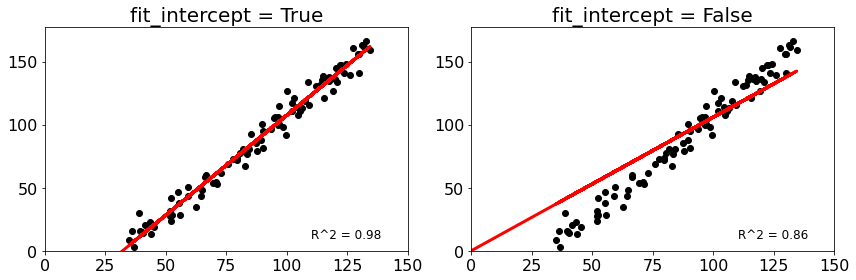

In [9]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4));

for index, model in enumerate([LinearRegression(fit_intercept=True), 
                               LinearRegression(fit_intercept=False)]): 
    model.fit(X,Y)
    predictions = model.predict(X)
    score = model.score(X, Y)
    
    ax[index].scatter(X, Y, color='black');
    ax[index].plot(X, model.predict(X), color='red',linewidth=3);

    ax[index].tick_params(labelsize = 16)
    ax[index].set_xlim(left = 0, right = 150)
    ax[index].set_ylim(bottom = 0)
    
    ax[index].text(110, 10, "R^2 = {:.2f}".format(score), fontsize = 12)

ax[0].set_title('fit_intercept = True', fontsize = 20)   
ax[1].set_title('fit_intercept = False',  fontsize = 20)    
fig.tight_layout()
fig.savefig('images/1B', dpi = 300)

### Example 1

In [10]:
data = load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
X = df.loc[:, ['RM', 'LSTAT', 'PTRATIO']].values
Y = df.loc[:, 'target'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=3)

In [12]:
reg = LinearRegression(fit_intercept=True)
reg.fit(x_train, y_train)
score = reg.score(x_test, y_test)
print("Score: {:.2f}".format(score*100))
print("Equation: y = {:.2f}x + {:.2f}".format(reg.coef_[0], reg.intercept_))

Score: 71.56
Equation: y = 4.11x + 21.52


### Example 2

In [13]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
X = df.loc[:, ['sepal length (cm)', 'sepal width (cm)',
               'petal length (cm)', 'petal width (cm)']].values
Y = df.loc[:, 'species'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=3)

In [15]:
reg = LinearRegression(fit_intercept=True)
reg.fit(x_train, y_train)
score = reg.score(x_test, y_test)
print("Score: {:.2f}".format(score*100))
print("Equation: y = {:.2f}x + {:.2f}".format(reg.coef_[0], reg.intercept_))

Score: 93.54
Equation: y = -0.04x + 0.07
